## 导包

In [ ]:
# 基础包
import os #路径
from numpy as np # numpy
from pandas as pd # pandas

# 数据读写
from sklearn.datasets import load_breast_cancer # sklearn 内置数据集
from sklearn.datasets import load_digits # sklearn 内置数据集
from sklearn.datasets import fetch_california_housing #加利福尼亚房屋价值数据集
from sklearn.datasets import load_wine # sklearn 内置数据集
from sklearn.datasets import make_blobs # sklearn 内置数据集 可以生成模拟聚类的数据
from sklearn.datasets import make_moons # sklearn 内置数据集 生成月亮形数据
from sklearn.datasets import make_gaussian_quantiles # sklearn 内置数据集 将一个单高斯分布的点集划分为两个数量均等的点集，作为两类

# 数据处理
from sklearn.preprocessing import KBinsDiscretizer #用于将数据分箱化
from sklearn.preprocessing import MinMaxScaler #用于将数据进行极差标准化
from sklearn.preprocessing import StandardScaler #用于将数据进行z-score标准化

# 画图
import matplotlib.pyplot as plt #画图的基础包
import plotly.graph_objs as go #三维画图(plotly画图神器)
import seaborn as sns #
%matplotlib inline #不写 show 也可以输出图像

# 建模
from sklearn import metrics #
from sklearn.model_selection import train_test_split #切分训练集和测试集
# 导入 KNN 算法模型API
from sklearn.neighbors import KNeighborsClassifier 
# 导入 高斯朴素贝叶斯 算法模型API
from sklearn.naive_bayes import GaussianNB
# 导入 多项式朴素贝叶斯 算法模型API
from sklearn.naive_bayes import MultinomialNB
# 导入 决策树 算法模型API
from sklearn.tree import DecisionTreeClassifier 
# 导入 kmeans 算法模型API
from sklearn.cluster import KMeans
# 导入 随机森林 算法模型API
from sklearn.ensemble import RandomForestClassifier
# 导入 adaboost 算法模型API
from sklearn.ensemble import AdaBoostClassifier
# 导入 线性回归 算法模型API
from sklearn.linear_model import LinearRegression
# 导入 多项式回归 算法模型API
from sklearn.preprocessing import PolynomialFeatures

# 调参
import sklearn # 可以用来查看交叉验证中可以使用的指标
from sklearn import metrics #
from sklearn.metrics import classification_report #生成报告
from sklearn.metrics import confusion_matrix #生成混淆矩阵
from sklearn.metrics import mean_squared_error # 线性回归均方误差MSE
from sklearn.metrics import mean_absolute_error # 线性回归绝对均值误差
from sklearn.metrics import silhouette_score #导入轮廓系数API
from sklearn.model_selection import cross_val_score #用来做交叉验证
from sklearn.model_selection import GridSearchCV #用来做网格搜索

# 构建机器学习工作流
from sklearn.pipeline import Pipeline

# 安装库时切换源
-i https://pypi.tuna.tsinghua.edu.cn/simple
# 例如:
pip install plotly -i https://pypi.tuna.tsinghua.edu.cn/simple #安装plotly三维画图库

## 基础设置

In [ ]:
pd.set_option('max_columns', 100) #显示100列数据
pd.set_option('max_rows', 100) #显示100列数据
# 忽略警告信息
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 可视化中正常显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# mac
plt.rcParams['font.family'] = ['Arial Unicode MS']

## 数据读写

### 读入数据

In [ ]:
# 读入数据
df = pd.read_csv('data/ma_resp_data_temp.csv' ) #以当前文件夹为起始位置
feature_dec = pd.read_excel('../保险案例数据字典.xlsx') # .. 表示从当前文件夹的上一层作为起始位置

### 保存数据

In [ ]:
# 将数据保存到本地
type_first.to_excel('../output/var_type_original.xlsx') #将数据保存到本地

### 内置数据集读入数据

In [ ]:
# sklearn 内置数据集
# 载入函数
from sklearn.datasets import load_breast_cancer
# 调用函数读入数据
breast_cancer = load_breast_cancer()
type(breast_cancer) #实际上是一个字典
# 看一下里面都有什么key
breast_cancer.keys()
#结果:
data : 数据
target : 监督标签
target_names : 分类名称
DESCR : 描述
feature_names: 特征名称
filename: 文件名
# 分类标签
breast_cancer.target_names

In [ ]:
# 读入加利福尼亚放假数据
housevalue = fetch_california_housing() #第一次会需要下载

### 生成数据

In [ ]:
rnd = np.random.RandomState(666) #设置随机数种子
X = rnd.uniform(-3, 3, size=100) #random.uniform，从输入的任意两个整数中取出size个随机数

In [ ]:
#创建测试数据：一系列均匀分布在横坐标上的点
line = np.linspace(-3, 3, 1000, endpoint=False)

#### 使用make_moons生成一个不均衡数据

In [ ]:
#生成数据
X_moon , y_moon = make_moons(500, noise = 0.1)
# 参数
n_samples : 生成的点的总数
shuffle : 样本是否洗牌
noise : 噪声,加在数据中的高斯噪声的标准差(0-1),越大数据越分散
random_state : 随机数种子

#### 使用make_blobs生成一个不均衡数据

In [ ]:
make_blobs( )
# 参数
n_samples : 待生成的样本的总数,整数,是所有点数,如果是数组,生成的是每一个聚类中的样本个数
n_features : 每个样本的特征数。
centers : 要生成的样本中心（类别）数，或者是确定的中心点。
cluster_std: 每个类别的方差，例如我们希望生成2类数据，其中一类比另一类具有更大的方差，可以将cluster_std设置为[1.0,3.0]。
center_box: pair of floats (min, max), optional (default=(-10.0, 10.0))
shuffle: boolean, optional (default=True)
random_state : 随机数种子

In [ ]:
# 生成二分类数据
class_1 = 500
class_2 = 50 #两个类别分别设定500和50个样本
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差
X, y = make_blobs(n_samples=[class_1, class_2],centers=centers,cluster_std=clusters_std,random_state=0, shuffle=False)

In [ ]:
# 生成二分类数据
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [0,0], [1,1], [2,2]] , cluster_std=[0.4, 0.2, 0.2, 0.2] ,
                  random_state =9)

#### 使用make_gaussian_quantiles将一个单高斯分布的点集划分为两个数量均等的点集，作为两类

In [ ]:
# 生成 500个样本, 协方差系数为2, 二分类数据 ,两个特征
X, y = make_gaussian_quantiles(cov=2.0,n_samples=500, n_features=2,n_classes=2, random_state=666)

## 数据预处理

In [ ]:
df[['c210cip', 'c210ebi','c210hmi']].corr() #变量之间的皮尔逊相关系数

### 基本处理

#### 改变形状

In [ ]:
# x是一维数组,给其增加一个轴,变成二维数组
x[:, np.newaxis]

#### 合并

In [ ]:
# 将两个进行打包查看
list(zip(X_train.columns,lr.coef_))

### 数据清洗

#### 缺失值

In [ ]:
# 对测试集 Age 空值采用均值填充
X_test.Age.fillna(X_train.Age.mean() , inplace= True)

In [ ]:
# 对测试集 Age 空值采用众数填充
X_test.Age.fillna(X_train.Age.mode()[0] , inplace= True)

#### 异常值

### 数据的集成、变换、规约

#### 极差标准化

In [ ]:
# 实例化API
min_max = MinMaxScaler( )
# 使用训练数据,训练min_max模型
min_max.fit(X_train)
# 使用训练好的转换器,对数据进行归一化(转换)
X_train_min_max = min_max.transform(X_train)

In [ ]:
# 实例化API
min_max_2 =  MinMaxScaler( )
# 先用 X_train 训练 , 再把 X_train 标准化
X_train_min_max_2 = min_max_2.fit_transform(X_train)

#### z-score标准化

In [ ]:
# 实例化 API
standard = StandardScaler( )
# 先用 X_train 训练 , 再对 X_train z-score标准化
X_train_standard = standard.fit_transform(X_train)

#### 数据分箱

In [ ]:
# 实例化
kbs = KBinsDiscretizer( )
# 参数
n_bins=5 : 每个特征中分箱的个数
encode='onehot'
strategy='quantile'

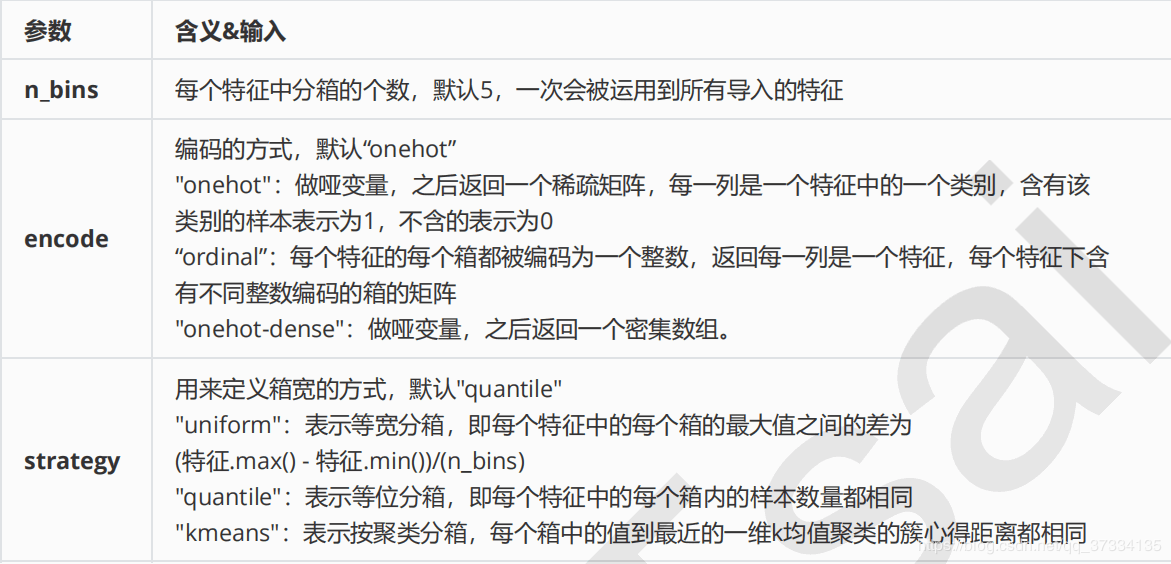

### 哑变量

In [ ]:
# Embarked 列转换成哑变量格式
t = data.Embarked.str
t.get_dummies()

### 数据编码

#### 字典方式

In [ ]:
# 数据编码, 性别编码
data.Sex = data.Sex.map({'male':0,'female':1})

#### 逻辑值编码

In [ ]:
(df.性别 == 'Female').astype('int')

### 切分训练集和测试集

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)
#*arrays : 数组 要切分的数据集
test_size : 测试集大小
train_size : 训练集大小
random_state : 切分时的随机数种子
shuffle : (默认值为True)
stratify : 

### 空值填充

In [ ]:
# 对训练集中的Age进行均值填充
X_train.Age.fillna(X_train.Age.mean(), inplace= True)

## 建模

### KNN

In [ ]:
# 使用KNN类,实例化一个KNN算法的对象
knn = KNeighborsClassifier(n_neighbors= 3 )

#knn = KNeighborsClassifier( ) 参数
n_neighbors=5 : 临近点的个数,默认值为5
weights='uniform' : 权重
algorithm='auto' : 算法,用于计算最近邻的算法
leaf_size=30 : 叶大小,默认为30
p=2 : p=1:曼哈顿距离,p=2:闵式距离(闵可夫斯基)
metric='minkowski' : 
metric_params=None :
n_jobs=None : 使用的处理器个数,-1为全部处理器
**kwargs : 

In [ ]:
# 用训练好的 knn 模型进行预测
knn.predict(test_data)
# 评估模型准确率
knn.score(test_data , [0,0,1])
# 预测输出概率值
knn.predict_proba(test_data)

In [ ]:
# 计算新的数据点的距离和索引值
knn.kneighbors(new_data.reshape(1,2), n_neighbors = 3)
# 结果
(array([[0.40311289, 0.48826222, 0.49193496]]), array([[6, 1, 4]]))

#### 超参数

In [ ]:
# 超参数 模型不能进行学习,只能有人工进行指定  参数: 模型在学习拟合的过程中可以自己去寻找最优值
# 查看当前模型的超参数值
knn.get_params()
# 提取某一个超参数值
knn.get_params()['n_neighbors']

### 贝叶斯

#### 高斯朴素贝叶斯

In [ ]:
# 实例化
gnb = GaussianNB()
# 参数
priors : 先验概率
var_smoothing : 平滑系数

#### 多项式朴素贝叶斯

In [ ]:
# 实例化
mnb = MultinomialNB()
# 参数
alpha=1.0 #平滑参数（0表示不平滑）
fit_prior=True
class_prior=None

### 决策树

In [ ]:
# 实例化
clf = DecisionTreeClassifier( )
# 参数
criterion='gini' : 指标 , 取值:“gini” 基尼系数（默认）、“entropy” 信息熵
splitter='best' : 切分 , 取值:'best' 最优、'random' 随机切分
max_depth=None : 最大深度
min_samples_split=2 : 最小样本分类个数,默认值为2
min_samples_leaf=1 : 最小叶节点样本个数,默认值为1
min_weight_fraction_leaf=0.0,
max_features=None : 最大考虑特征
random_state=None : 随机数种子
max_leaf_nodes=None : 最大叶节点个数
min_impurity_decrease=0.0 : 最小不纯度下降
min_impurity_split=None : 最小不纯度分类
class_weight=None : 样本权重
presort=False,

#### 建立有样本权重的模型

In [ ]:
clf_weight = DecisionTreeClassifier(max_depth=4,class_weight= {0: 1, 1: 10} ,random_state=666) #0类的权重为1,1类的权重为10

### Kmeans

In [ ]:
# 实例化
kmeans = KMeans( )
# 参数
n_clusters=8, # int, optional  聚类的数量
init=&apos;k-means++&apos;, # 一种选择初始质心的方法
n_init=10,# 使用不同质心种子运行k-means算法的次数。 在inertia，最终结果将是n_init连续运行的最佳输出。
max_iter=300, # 最大迭代次数,如果超过此次数将不会继续迭代
tol=0.0001, # MSE 下降到什么数值大小的时候停止迭代
precompute_distances=&apos;auto&apos;,
verbose=0 : 日志,例:verbose=2
random_state=None, # 随机数种子
copy_x=True,
n_jobs=None, # 使用cpu核心数量
algorithm=&apos;auto&apos;,


In [ ]:
# 实例化
kmeans = KMeans(n_clusters=i, random_state=666)
# 训练
kmeans.fit(X)
# 接收聚类结果
y_pred = kmeans.predict(X)
# 训练并接受聚类结果
y_pred = kmeans.fit_predict(X)
# 类标签
label4 = kmeans4.labels_
# 类中心点
center4 = kmeans4.cluster_centers_

### 随机森林

In [ ]:
RandomForestClassifier( )
# 参数
n_estimators='warn' : 森林中数的数量,即基评估器的数量.往往数量越大,模型效果越好
criterion='gini' : 不纯度的衡量指标，有基尼系数和信息熵两种选择
max_depth=None : 树的最⼤深度，超过最⼤深度的树枝都会被剪掉
min_samples_split=2 : ⼀个节点必须要包含⾄少min_samples_split个训练样本，这个节点才允许被分枝，否则分枝就不会发⽣
min_samples_leaf=1 : ⼀个节点在分枝后的每个⼦节点都必须包含⾄少min_samples_leaf个训练样本，否则分枝就不会发⽣
min_weight_fraction_leaf=0.0,
max_features='auto' : 限制分枝时考虑的特征个数，超过限制个数的特征都会被舍弃，默认值为总特征个数开平⽅取整
max_leaf_nodes=None,
min_impurity_decrease=0.0 : 限制信息增益的⼤⼩，信息增益⼩于设定数值的分枝不会发⽣
min_impurity_split=None,
bootstrap=True,
oob_score=False : 是否使用袋外数据做评估,如果要使用,这里要设置oob_score=True
n_jobs=None,
random_state=None,
verbose=0,
warm_start=False,
class_weight=None,

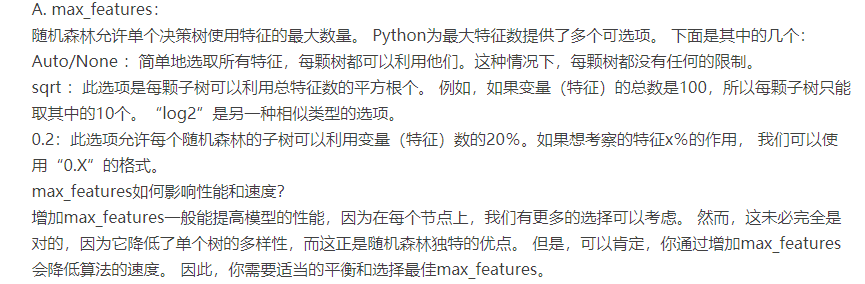

In [ ]:
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)

### Adaboost

In [ ]:
AdaBoostClassifier( )
# 参数
base_estimator=None,
n_estimators=50,
learning_rate=1.0,
algorithm='SAMME.R',
random_state=None,

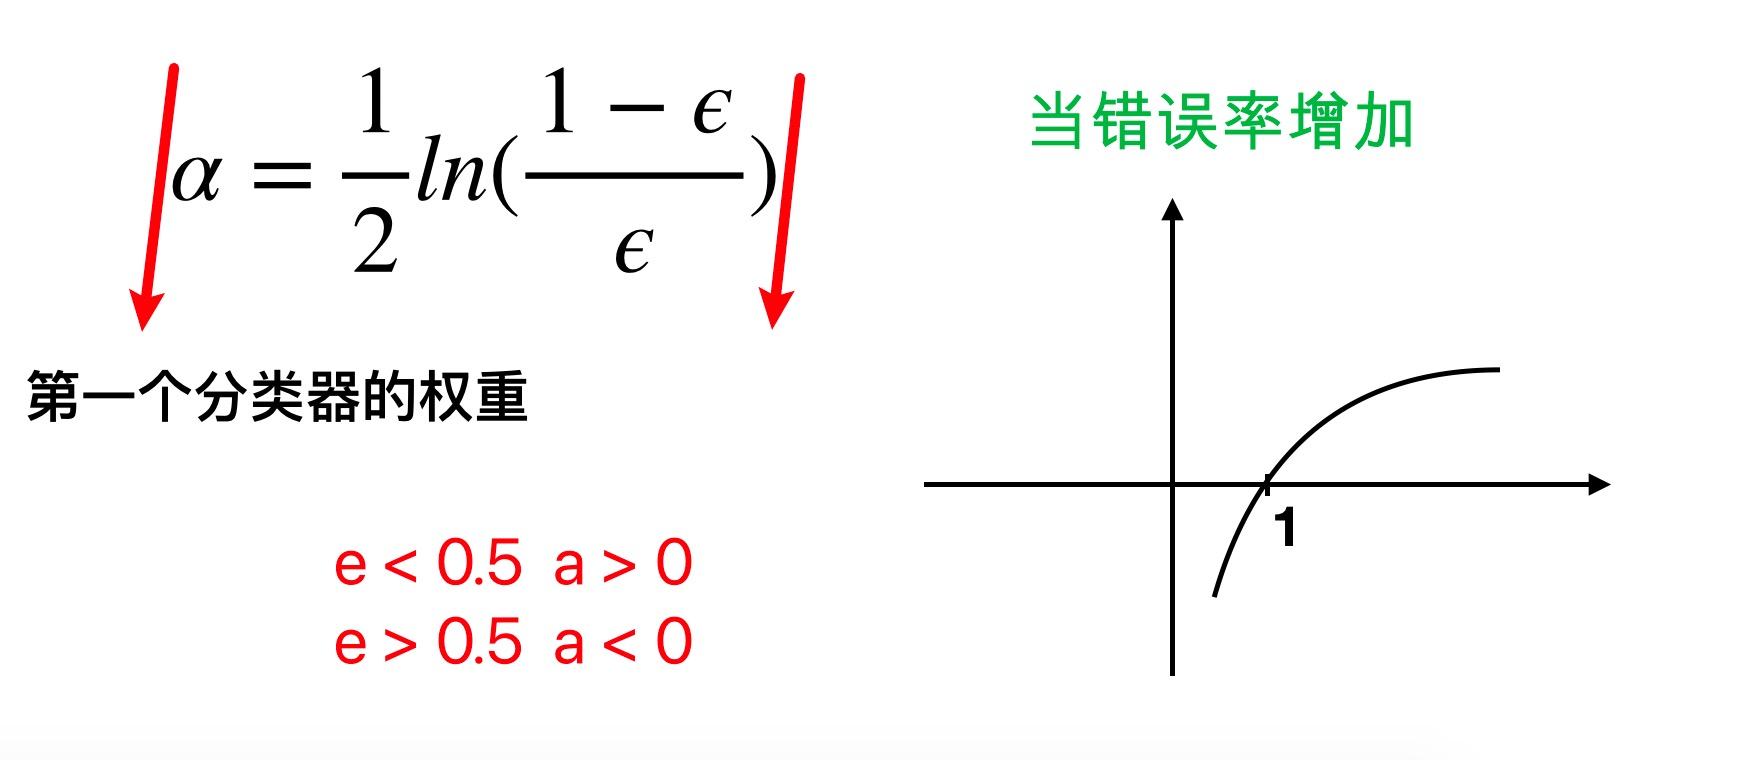

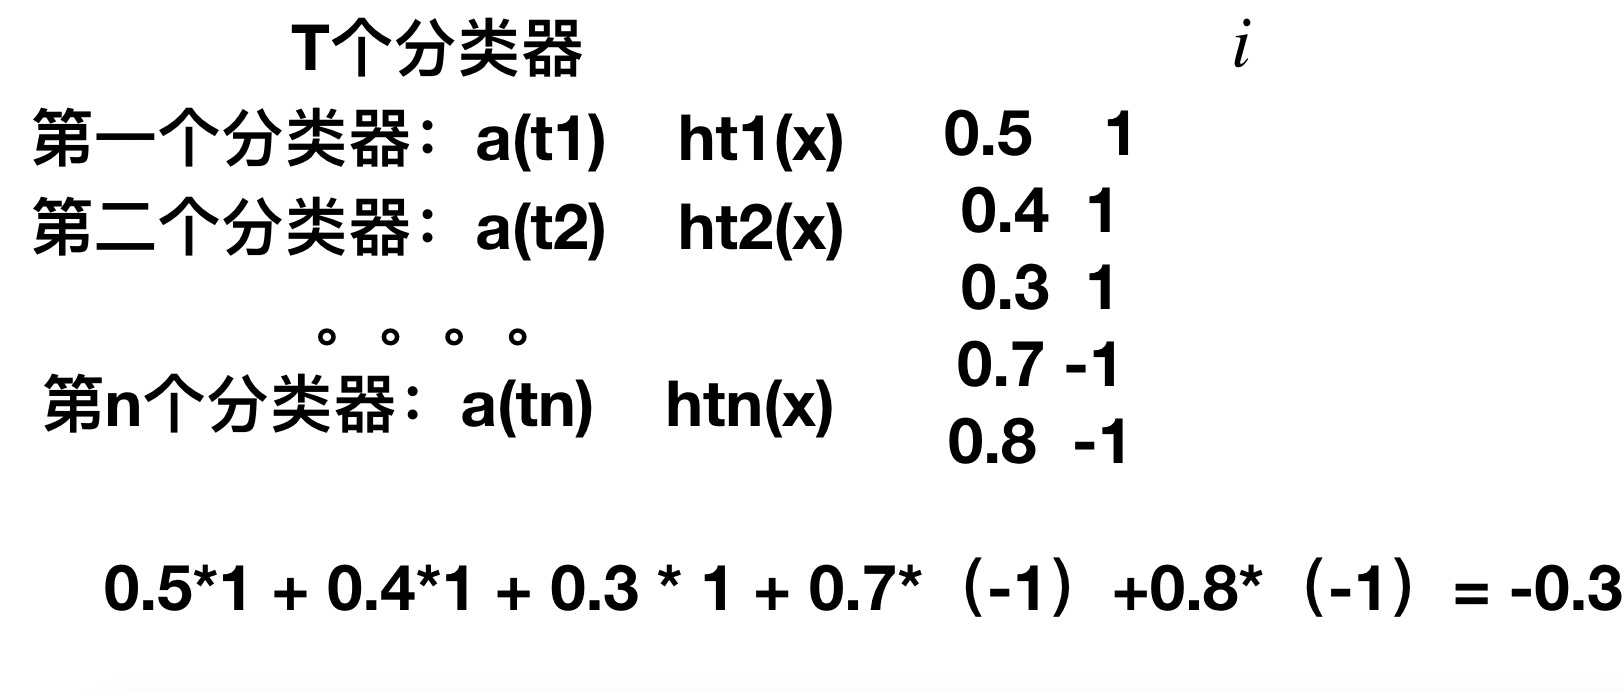

In [ ]:
# 实例化基分类器
decision_tree = DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5)
# 实例化 adaboost分类器
ada = AdaBoostClassifier(base_estimator=decision_tree, algorithm='SAMME.R', n_estimators=50,learning_rate=1,random_state=666)

### 线性回归

In [ ]:
LinearRegression( )
# 参数
fit_intercept=True : 是否考虑截距
normalize=False : 归一化,考虑截距时做回归之前数据将被通过(减均值除以L2范数)进行归一化
copy_X=True,
n_jobs=None

In [ ]:
# 实例化模型
lr = LinearRegression()

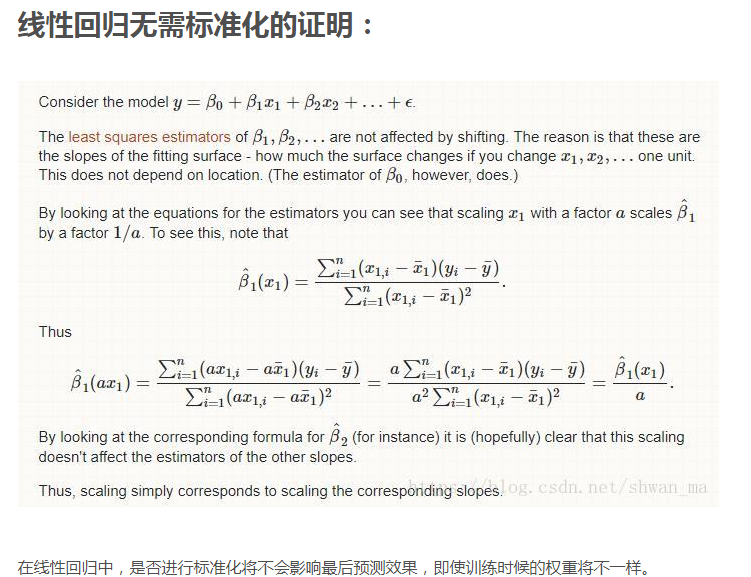

### 多项式回归

In [ ]:
PolynomialFeatures( )
# 参数:
degree=2 : 多项式中的次数,默认为2
interaction_only=False : 布尔值,是否只产生交互项,默认值为False
include_bias=True : 布尔值,是否产生于截距项相乘的x0,默认为True

In [ ]:
poly_3_only_bias = PolynomialFeatures(degree = 3 , interaction_only=True , include_bias=False )

## 调参

### 交叉验证

In [ ]:
cross_val_score( )
# 参数
estimator,
X,
y=None,
groups=None,
scoring=None : 积分器,可以用来指定指标
cv='warn',
n_jobs=None,
verbose=0,
fit_params=None,
pre_dispatch='2*n_jobs',
error_score='raise-deprecating',

#### 在KNN中寻找最优的k

In [ ]:
# 建立空列表储存分数结果
scores = []
stds = []
# k 值 从1 到 30
for i in range(1,31):
    # 实例化模型
    knn = KNeighborsClassifier(n_neighbors= i)
    # 使用交叉验证
    cross_result = cross_val_score(knn, X_train , y_train , cv = 5)
    # 求平均值
    mean_score = cross_result.mean()
    # 求标准差
    std = cross_result.std()
    scores.append(mean_score)
    stds.append(std)
# 绘制学习曲线
plt.plot(range(1,31), scores , color = 'black')
plt.plot(range(1,31), np.array(scores) + np.array(stds) , color = 'red')
plt.plot(range(1,31), np.array(scores) - np.array(stds) , color = 'red')

#### 在朴素贝叶斯中寻找最优平滑系数

In [ ]:
len_arange = len(np.arange(1, 0.01 , -0.02))
# 交叉验证分数结果接收列表
cross_list = []
train_score_list = []
test_score_list = []
# 对这个列表中的值进行遍历
for i in np.arange(1, 0.01 , -0.02):
    # 实例化
    gnb = GaussianNB(var_smoothing = i )
    # 交叉验证
    cross_score = cross_val_score(gnb, X_train , y_train ,cv=5 )
    # 五次交叉验证平均值添加进来
    cross_list.append(cross_score.mean())
    # 直接用模型对全部训练集进行建模
    gnb.fit(X_train, y_train)
    # 训练集分数
    train_score = gnb.score(X_train, y_train)
    test_score = gnb.score(X_test, y_test)
    train_score_list.append(train_score)
    test_score_list.append(test_score)
plt.plot( np.arange(1, 0.01 , -0.02), test_score_list , color = 'red')
plt.plot(np.arange(1, 0.01 , -0.02) , train_score_list , color = 'blue')
plt.plot(np.arange(1, 0.01 , -0.02) , cross_list , color = 'green')

#### 决策树中调整最小叶节点分裂样本个数

In [ ]:
# 建立列表接收数据
# 接收测试集数据
# score_test = []
# 交叉验证列表
scores = []
# min_samples_split , 3 - 20
for i in range(3,50):
    # 建模
    clf = DecisionTreeClassifier(min_samples_leaf= i , random_state=666 )
    # 使用交叉验证
    cross_result = cross_val_score(clf, X_train , y_train , cv = 5)
    # 求出分数的平均值
    score_mean = cross_result.mean()
    # 计算训练集分数
    scores.append(score_mean)
plt.plot(range(3,50) , scores , color= 'red')

#### 线性回归中调参

In [ ]:
# 查看交叉验证中可以使用的指标
sorted(sklearn.metrics.SCORERS.keys())

In [ ]:
cross_val_score(lr,X,y,cv=10,scoring="neg_mean_squared_error") # 使用均方误差作为标准

### 散点图

#### kmeans 将轮廓系数的值绘制在图上

In [ ]:
plt.figure(figsize=(10,12))
inertias = [] # 用于接收结果
sil = [] # 用于接收结果
for i in range(2, 8):# 2 - 7
    kmeans = KMeans(n_clusters=i, random_state=666)
    y_pred = kmeans.fit_predict(X)
    # 将6个图绘制到一张画布上来
    plt.subplot(3,2,i-1) # 行 列 第几个  3,2,2
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'red',s=100 )
    plt.xlabel("k="+str(i))
    
    # 轮廓系数
    s = silhouette_score(X, y_pred)
    sil.append(s)
    # 在图片上面添加文本
    plt.text(0,-2, "silhouette_score:"+str(round(s,3)), size =11)
    # 样本组内距离平方和
    inertias.append(kmeans.inertia_)
plt.show()   

### 网格搜索

In [ ]:
grid_search = GridSearchCV( )
#参数
estimator, 评估器: 实例化的算法模型
param_grid : 网格搜索参数字典
scoring=None : 模型评估的指标, 模型是准确率
n_jobs=None : 计算使用的CPU处理器个数
cv=5 : 交叉验证次数
verbose=0 : 调参中的日志输出,例如:verbose=2

In [ ]:
# 确定调整哪些参数, 以及调节范围
# criterion=  基尼  信息熵
# map_depth 1 - 15
# min_samples_leaf 3 - 50
# min_impurity_split 逐渐把这个值变大 2倍 3倍 4倍

# 构造参数字典, 字典中的key,参数名称, 字典中的value 参数变化的序列
d = {"criterion":['gini','entropy'],
    "max_depht":range(1,16),
    "min_samples_leaf":range(3,51),
    "min_impurity_split":np.arange(1e-7 , 1e-6,1e-7 )}

# 实例化模型
clf = DecisionTreeClassifier(random_state=666)

grid_search = GridSearchCV(clf , param_grid=d ,cv=5 ,
                           n_jobs= -1,verbose=10)

# 使用网格搜索API训练模型
grid_search.fit(X_train , y_train)

# 最终结果
grid_search.best_estimator_
grid_search.best_score_ : # 最优分数
grid_search.best_params_ : # 最优参数值
grid_search.score(X_test, y_test)

### 混淆矩阵

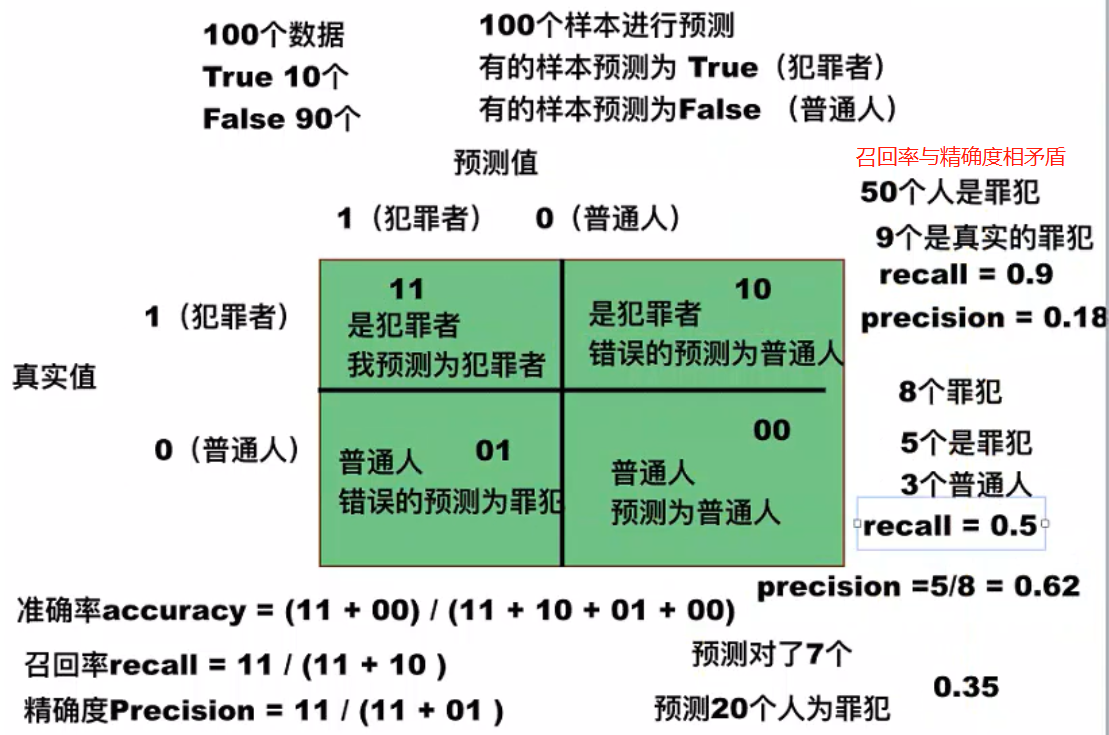

调和频数(F1 score)
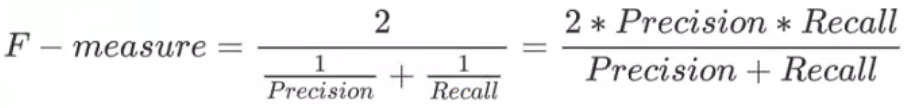

#### 使用混淆矩阵查看贝叶斯分类的结果

In [ ]:
# 在混淆矩阵中查看预测结果
confusion_matrix( )
# 参数
y_true
y_pred
labels=None
sample_weight=None

# 测试集的准确率
accuracy_score( )
# 参数
y_true
y_pred
normalize=True
sample_weight=None

# 测试集的召回率
recall_score( )
# 测试集的精准度
precision_score( )
# f1
f1_score( )
# 以上几个函数的参数
y_true
y_pred
labels=None : 更改类的排列顺序,例如:labels=[1,0]
pos_label=1 : 默认为1,可已通过更改值更改测量对象
average='binary'
sample_weight=None : 样本权重

In [ ]:
# 查看预测结果
y_pred_test = gnb.predict(X_test)
# 在混淆矩阵中查看预测结果
confusion_matrix(y_test , y_pred_test)
# 改变类的排列顺序,默认 0,1
confusion_matrix(y_test , y_pred_test , labels=[1,0])
# 测试集的准确率
accuracy_score(y_test , y_pred_test)
# 测试集的召回率
recall_score(y_test , y_pred_test )
# 测试集的精准度
precision_score(y_test, y_pred_test)
# f1
f1_score(y_test , y_pred_test)

#### 绘制混淆矩阵-seaborn

In [ ]:
sns.heatmap( )
# 参数


In [ ]:
# 混淆矩阵
mat = confusion_matrix(y_test, y_pred)
# 利用 seaborn将混淆矩阵可视化出来
sns.heatmap(mat ,annot = True , square=True )
plt.ylabel("true label")
plt.xlabel('predicted label')

### adaboost调基分类器的参数

In [ ]:
params = {
    "base_estimator__max_depth":range(2,10),
    "base_estimator__criterion":["gini", "entropy"],
    "algorithm":['SAMME.R',"SAMME"], # 2次
#     "n_estimators": range(10,300,10), # 29次
#     "learning_rate":[1,0.8,0.5,0.1] # 4 次    232
}

### 特征重要性

In [ ]:
clf.feature_importances_

### 分类报告

In [ ]:
print(classification_report(y_test, y_pred))
# 宏平均值(未加权平均值)
# 
# 加权平均值

## 模型评估

### 模型准确度

In [ ]:
clf.score(X_test , y_test)

### 使用混淆矩阵评分

In [ ]:
# 查看预测结果
y_pred_test = gnb.predict(X_test)
# 在混淆矩阵中查看预测结果
confusion_matrix(y_test , y_pred_test)
# 改变类的排列顺序,默认 0,1
confusion_matrix(y_test , y_pred_test , labels=[1,0])
# 测试集的准确率
accuracy_score(y_test , y_pred_test)
# 测试集的召回率
recall_score(y_test , y_pred_test )
# 测试集的精准度
precision_score(y_test, y_pred_test)
# f1
f1_score(y_test , y_pred_test)

### Kmeans聚类结果评估

In [ ]:
# 样本离最近聚类中心的平方和
kmeans.inertia_
# 轮廓系数的值
silhouette_score(X, y_pred)
# CH指标
c = metrics.calinski_harabaz_score(X, y_pred) #导包:from sklearn import metrics

### 随机森林的重要属性之一：estimators，查看森林中树的状况

In [ ]:
#随机森林的重要属性之一：estimators，查看森林中树的状况
rfc.estimators_[0].random_state

for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

### 随机森林oob_score_评估

In [ ]:
#重要属性oob_score_
rfc.oob_score_

### 线性回归

#### 基础评价

In [ ]:
# 拟合出的斜率/系数
lr.coef_
# 拟合出的截距
lr.intercept_
# 查看模型在训练集上R2的值
lr.score(X_train, y_train)

#### MSE均方误差

sklearn中使用RSS的变体，均方误差MSE（mean squared error）来衡量我们的预测值和真实值的差异：

$$
MSE = \frac{1}{m}\sum_{i=1}^{m}({y_i} - {\hat{y}_i})^2
$$

在sklearn当中，我们有两种方式调用这个评估指标，一种是使用sklearn专用的模型评估模块metrics里的类mean_squared_error，另一种是调用交叉验证的类cross_val_score并使用里面的scoring参数来设置使用均方误差。

In [ ]:
# 测试集上的平均标准误差
mean_squared_error(y_predict, y_test) # 均方误差MSE

虽然均方误差,从公式角度来看应该永远为正，

但是sklearn中的参数scoring下，均方误差作为评判标准时，却是计算”负均方误差“（neg_mean_squared_error）。

这是因为sklearn在计算模型评估指标的时候，会考虑指标本身的性质，均方误差本身是一种误差，所以被sklearn划分为模型的一种损失(loss)

在sklearn当中，所有的损失都使用负数表示，因此均方误差也被显示为负数了。真正的均方误差MSE的数值，其实就是neg_mean_squared_error去掉负号的数字

#### MAE（Mean absolute error，绝对均值误差）

除了MSE，我们还有与MSE类似的MAE（Mean absolute error，绝对均值误差）：

$$
MAE = \frac{1}{m}\sum_{i=0}^{m-1}|{y_i} - {\hat{y}_i}|
$$

其表达的概念与均方误差完全一致，不过在真实标签和预测值之间的差异外我们使用的是L1范式（绝对值）。

使用中，MSE和MAE选一个来使用就好了。

在sklearn当中，我们使用命令 from sklearn.metrics import mean_absolute_error来调用MAE，同时，我们也可以使用交叉验证中的 scoring = "neg_mean_absolute_error"，以此在交叉验证时调用MAE。

In [ ]:
cross_val_score(lr,X,y,cv=10,scoring="neg_mean_absolute_error")

#### $R^2$

在$R^2$中，分子是真实值和预测值之差的差值，也就是我们的模型没有捕获到的信息总量，分母是真实标签所带的信息量，所以其衡量的是**1 - 我们的模型没有捕获到的信息量占真实标签中所带的信息量的比例**，所以，$R^2$越接近1越好。

$R^2$可以使用三种方式来调用，一种是直接从metrics中导入r2_score，输入预测值和真实值后打分。

第二种是直接从线性回归LinearRegression的接口score来进行调用。

第三种是在交叉验证中，输入"r2"来调用。

In [ ]:
r2_score(y_test, y_predict)

## 可视化

In [ ]:
# 改变风格
plt.style.use('ggplot')
# 图的大小与清晰度
plt.figure(figsize= (6,4) , dpi = 300)
# 子图,多个图画到一个画布上
plt.subplot(3,2,i-1) # 行 列 第几个  3,2,2
# 图的标题与横纵坐标
plt.title('10瓶红酒') #标题
plt.xlabel('酒精浓度') #横坐标标题
plt.ylabel('颜色深度') #纵坐标标题
# 在图片上面添加文本
plt.text(-1,-2, "calinski_harabaz_score:"+str(round(c,3)), size =14)
#显示图例 , 图例位置 plt.scatter( )参数中要设置label参数
plt.legend(loc = 2)
plt.show()

### 散点图

In [ ]:
plt.scatter( )
#参数
x, y : 横坐标 , 纵坐标
s : 点的大小
c : 颜色 例如: c=red
marker : 标记样式
label : 图例名
cmap : 颜色映射,例如: cmap='rainbow'
norm : 
vmin, vmax : 
alpha : 透明度
linewidths : 线宽
edgecolors : 

In [ ]:
# 散点图
plt.figure(figsize= (6,4) , dpi = 300)
plt.scatter(wine_data[wine_data.品种 == 0]['酒精浓度'], wine_data[wine_data.品种 == 0]['颜色深度'], c = 'purple', label = '黑皮诺' )
plt.scatter(wine_data[wine_data.品种 == 1]['酒精浓度'], wine_data[wine_data.品种 == 1]['颜色深度'], c = 'red' , label = '赤霞珠' )
plt.title('10瓶红酒') #标题
plt.xlabel('酒精浓度') #横坐标标题
plt.ylabel('颜色深度') #纵坐标标题
plt.text(-1,-2, "calinski_harabaz_score:"+str(round(c,3)), size =14) # 在图片上面添加文本
# 图例添加 1. scatter 里面 添加 label 2. 添加plt.legend()
plt.legend(loc = 2) #显示图例 , 图例位置
plt.show()

### 折线图

In [ ]:
plt.plot( )
#参数


In [ ]:
plt.plot(range(1,11),tr,color="red",label="train",'-')

### 条形图

In [ ]:
sns.countplot( )
# 参数


In [ ]:
sns.countplot( data = df , y = 'resp_flag' )

### 子图

In [ ]:
plt.subplot( )
# 参数


In [ ]:
#绘制子图
plt.subplot(1,3,n) #行数,列数,第几个
# 调整子图之间的间隔
plt.subplots_adjust(wspace=0.3)

### 多图

#### 绘制所有特征相关关系

In [ ]:
sns.pairplot( )
# 参数
data : 类型为 DataFrame
hue=None : 色调
hue_order=None : 色调顺序
palette=None : 调色板
vars=None : 变量名列表
x_vars=None
y_vars=None
kind='scatter' : {'scatter'，'reg'} reg-回归线
diag_kind='auto' : {'auto'，'hist'，'kde'} kde-对角线上的图为密度曲线
markers=None : 用于数据点的标记
height=2.5,
aspect=1,
dropna=True,
plot_kws=None,
diag_kws=None,
grid_kws=None,
size=None,

In [ ]:
# 使用pairplot绘制所有特征相关关系
sns.pairplot(df[['年龄','年收入','花费分数']])

### 组合图

#### 条形图加折线图

In [ ]:
sns.distplot( )
# 参数
a,
bins=None,
hist=True,
kde=True,
rug=False,
fit=None,
hist_kws=None,
kde_kws=None,
rug_kws=None,
fit_kws=None,
color=None,
vertical=False,
norm_hist=False,
axlabel=None,
label=None,
ax=None,

In [ ]:
sns.distplot(df.age , bins = 20)

### 学习曲线

#### KNN中绘制学习曲线寻找最优k

In [ ]:
# 定义一个列表,储存分数变化值
scores = []
# k:超参数, 模型不能进行学习,只能有人工进行指定  参数: 模型在学习拟合的过程中可以自己去寻找最优值
for i in range(1, 51):
    # 建模
    knn = KNeighborsClassifier(n_neighbors= i)
    # 训练
    # 对数据进行训练 , 训练传入的是训练集
    knn.fit(X_train, y_train)
    # 评分
    # 看一下模型的效果, 测试集分钟
    scores.append( knn.score(X_test, y_test))
# 绘制一个曲线描述随着k的变化, 分数的变化情况
plt.plot(range(1,31) , scores)

#### 决策树中绘制学习曲线调整最大深度

In [ ]:
# 建立列表接收数据
# 接收测试集数据
score_test = []
# 接收训练集数据
score_train = []
# max_depth 是 1 - 10
for i in range(1,11):
    # 建模
    clf = DecisionTreeClassifier(max_depth= i , random_state=666 )
    # 训练
    clf.fit(X_train , y_train)
    # 计算训练集分数
    score_train.append(clf.score(X_train , y_train))
    # 计算测试集分数
    score_test.append(clf.score(X_test , y_test))
# 绘制训练集和测试集的分数变化曲线
plt.plot(range(1,11) , score_train , color= 'red')
plt.plot(range(1,11) , score_test , color= 'green')

### 数组绘图(像素图)

In [ ]:
plt.imshow( ) 
# 参数
X : 要绘图的矩阵,数组
cmap=None : 图像映射
norm=None,
aspect=None : 控制轴的纵横比
interpolation=None : 差值
alpha=None : 介于0（透明）和1（不透明）之间
vmin=None,
vmax=None,
origin=None : 将数组的[0,0]索引放在左上角或左下角,取值:{'upper'，'lower'},默认为'upper'
extent=None : 范围
shape=None : 形状,标量（列、行）,
filternorm=1,
filterrad=4.0,
imlim=None,
resample=None,
url=None,
*,
data=None,
**kwargs,

In [ ]:
plt.imshow(digits.images[0] , cmap=plt.cm.binary ,interpolation='nearest') #interpolation='nearest' 差值用的是最近邻的方法

In [ ]:
#绘制64张图像

# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

### 决策边界

In [ ]:
h = 0.02

# 生成数据中x的坐标范围 最小值
x_min = X1[:,0].min() - 1
# 生成数据中x的坐标范围 最大值
x_max = X1[:,0].max() + 1
np.arange(x_min, x_max , h)

# 生成数据中y的坐标范围 最小值
y_min = X1[:,1].min() - 1
# 生成数据中y的坐标范围 最小值
y_max = X1[:,1].max() + 1
np.arange(y_min, y_max , h)

xx , yy = np.meshgrid(np.arange(x_min, x_max , h) , np.arange(y_min, y_max , h)) #生成所有点的横、纵坐标

# 把所有的点,都带入到kmeans4 这个模型中进行预测, 预测结果一定是0,1,2,3
Z = kmeans4.predict(np.c_[xx.ravel(), yy.ravel()])

Z1 = Z.reshape(xx.shape)

# 绘制决策边界
plt.imshow(Z1 , interpolation = 'nearest' , extent = [xx.min() , xx.max() , yy.min(), yy.max()],
           cmap = plt.cm.Pastel2 , aspect = 'auto', origin = 'lower')
# 绘制所有点
plt.scatter(x = '年龄', y = '花费分数',data =df , c =label4,s = 100 )
# 绘制四个中心点
plt.scatter(x =center4[:,0], y = center4[:,1],s = 300,c='red',alpha = 0.5)
plt.xlabel('年龄'),plt.ylabel('花费分数')
plt.show()

### 绘制三维图形

In [ ]:
go.Scatter3d( )
# 参数

In [ ]:
df['label4'] =  label4
trace1 = go.Scatter3d(
    x= df['年龄'],
    y= df['年收入'],
    z= df['花费分数'],
    mode='markers',
     marker=dict(
        color = df['label4'], 
        size= 20,
        line=dict(
            color= df['label4'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = '年龄'),
            yaxis = dict(title  = '年收入'),
            zaxis = dict(title  = '花费分数')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## 构建机器学习工作流

In [ ]:
Pipeline( )
# 参数
steps
memory=None

In [ ]:
poly = PolynomialFeatures(degree=2)
std = StandardScaler()
reg = LinearRegression()
# 构建工作流
pipeline = Pipeline([('多项式特征',poly),("标准化",std),("线性回归",reg)])

### 查看工作流

In [ ]:
pipeline.fit(X,y)

In [ ]:
pipeline

In [ ]:
pipeline.get_params()

In [ ]:
# 调整其中某个模型参数
# 查看线性回归模型中截距参数的值
pipeline.get_params()['线性回归'].fit_intercept

### 修改参数

In [ ]:
pipeline.set_params(多项式特征__degree = 3)